In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('SYB66_246_202310_Population Growth, Fertility and Mortality Indicators.csv', encoding = 'latin1')
df.head()

,Region/Country/Area,Population growth and indicators of fertility and mortality,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."


# Selecion y limpieza del DataFrame

In [5]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())
# Filtrar para el año 2020
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_2020 = df[df['Year'] == 2020]
print(df_2020['Series'].unique())

['Region/Country/Area', 'Population growth and indicators of fertility and mortality', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
['Population annual rate of increase (percent)'
 'Total fertility rate (children per women)'
 'Infant mortality for both sexes (per 1,000 live births)'
 'Maternal mortality ratio (deaths per 100,000 population)'
 'Life expectancy at birth for both sexes (years)'
 'Life expectancy at birth for males (years)'
 'Life expectancy at birth for females (years)']


In [13]:
infant_mortality_series = 'Infant mortality for both sexes (per 1,000 live births)'
life_expectancy_series = 'Life expectancy at birth for both sexes (years)'

# Filtrar los datos para las series de interés
df_usar_mortality = df_2020[df_2020['Series'] == infant_mortality_series]
df_usar_life = df_2020[df_2020['Series'] == life_expectancy_series]

# Unir los DataFrames filtrados en uno solo usando 'Region/Country/Area'
df_real = pd.merge(df_usar_mortality, df_usar_life, on='Region/Country/Area', suffixes=('_mortality', '_life_expectancy'))

# Seleccionar y renombrar columnas para claridad
df_real = df_real[['Region/Country/Area', 'Value_mortality', 'Value_life_expectancy']]
df_real.columns = ['Country', 'Infant_mortality', 'Life_expectancy']
df_real = df_real.dropna()


print(df_real.head())


   Country Infant_mortality Life_expectancy
0        1             28.3              72
1        2             46.4            62.2
2       15             22.6            71.2
3      202               50            60.3
4       14             38.3            63.7


# Grafica

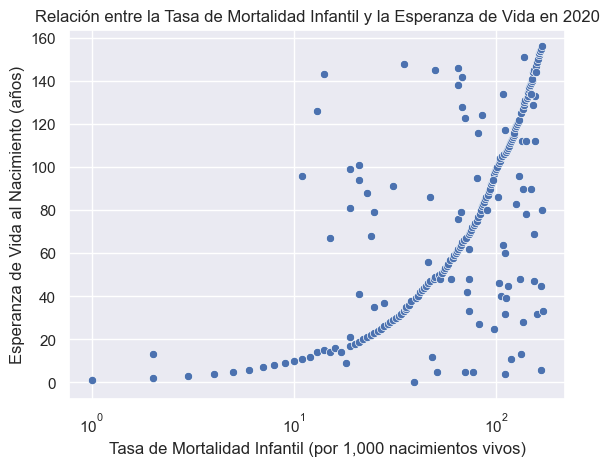

In [29]:
sns.set(style="darkgrid")
sns.scatterplot(data=df_real, x='Infant_mortality', y='Life_expectancy')
plt.title('Relación entre la Tasa de Mortalidad Infantil y la Esperanza de Vida en 2020')
plt.xlabel('Tasa de Mortalidad Infantil (por 1,000 nacimientos vivos)')
plt.ylabel('Esperanza de Vida al Nacimiento (años)')
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.yscale('linear')
plt.gca().invert_yaxis()
plt.show()

# Comentario: A mayor esperanza de vida, menor mortalidad infantil